In [72]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from io import StringIO
import collections
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lmfit import Model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import umap
#from tpot import TPOTClassifier
import warnings

In [73]:
#read features into Pandas DataFrame
data=pd.read_csv('data.csv')

In [74]:
data.shape

(801, 20532)

In [75]:
#read labels
labels =pd.read_csv('labels.csv')

In [76]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [77]:
#drop datapoints ID
X = data.drop(data.columns[0],axis=1)
Y = labels.Class
X = X.values
Y = np.array(Y)

In [78]:
count_labels = collections.Counter(Y)
count_labels

Counter({'PRAD': 136, 'LUAD': 141, 'BRCA': 300, 'KIRC': 146, 'COAD': 78})

<BarContainer object of 5 artists>

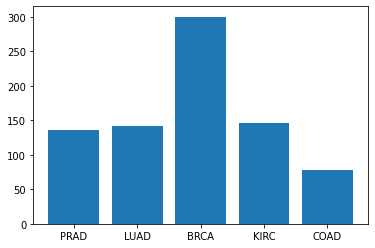

In [79]:
cnt = collections.Counter(count_labels)
plt.bar(cnt.keys(), cnt.values())

In [80]:
Xt = X[:200,:]
Yt = Y[:200]

Xv1 = X[200:400,:]
Yv1 = Y[200:400]

Xv2 = X[400:600,:]
Yv2 = Y[400:600]

In [81]:
Xt.shape, Xv1.shape, Xv2.shape

((200, 20531), (200, 20531), (200, 20531))

## Principal component analysis (PCA)

In [88]:
pca = PCA()
pca.fit_transform(Xt)

array([[-6.92845234e+01,  1.22758590e+02,  4.36730233e+01, ...,
        -1.56008615e-01, -1.95688074e-01,  9.95931529e-14],
       [ 1.41076711e+01, -8.56167166e+01,  5.04881579e+01, ...,
         1.78804848e-01,  3.34504380e-01,  9.95931529e-14],
       [-6.66606360e+01,  1.85613260e+01,  4.77366171e+01, ...,
         5.53711482e-01, -4.29907618e-01,  9.95931529e-14],
       ...,
       [-5.29462112e+01, -5.74812141e+01, -7.32971780e+01, ...,
         7.59861041e-02,  5.04320986e-02,  9.95931529e-14],
       [ 1.51180044e+01, -6.47089571e+01,  5.34666882e+01, ...,
         1.15697041e-01,  3.09529867e-01,  9.95931529e-14],
       [ 1.37167206e+01, -4.85377611e+01,  3.89509567e+01, ...,
         3.29564416e-01,  8.42573948e-01,  9.95931529e-14]])

In [89]:
total = sum(pca.explained_variance_)
k = 0
th = 0.35
current_variance = 0
while current_variance/total < th:
    current_variance += pca.explained_variance_[k]
    k = k + 1
print(k, " features explain around ", th,"  of the variance. From 20531 features to ", k, sep='')

3 features explain around 0.35  of the variance. From 20531 features to 3


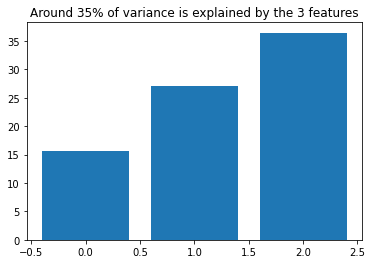

In [90]:
pca = PCA(n_components=k)
Xt_pca = pca.fit_transform(Xt)
Xv1_pca = pca.transform(Xv1)
Xv2_pca = pca.transform(Xv2)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp)
plt.title("Around 35% of variance is explained by the 3 features");


In [92]:
pca99 = PCA()
pca99.fit_transform(Xt)

array([[-6.92845234e+01,  1.22758590e+02,  4.36730233e+01, ...,
        -1.56008615e-01, -1.95688074e-01,  9.95931529e-14],
       [ 1.41076711e+01, -8.56167166e+01,  5.04881579e+01, ...,
         1.78804848e-01,  3.34504380e-01,  9.95931529e-14],
       [-6.66606360e+01,  1.85613260e+01,  4.77366171e+01, ...,
         5.53711482e-01, -4.29907618e-01,  9.95931529e-14],
       ...,
       [-5.29462112e+01, -5.74812141e+01, -7.32971780e+01, ...,
         7.59861041e-02,  5.04320986e-02,  9.95931529e-14],
       [ 1.51180044e+01, -6.47089571e+01,  5.34666882e+01, ...,
         1.15697041e-01,  3.09529867e-01,  9.95931529e-14],
       [ 1.37167206e+01, -4.85377611e+01,  3.89509567e+01, ...,
         3.29564416e-01,  8.42573948e-01,  9.95931529e-14]])

In [96]:
total2 = sum(pca99.explained_variance_)
l = 0
t = 0.99
c = 0
while c/total2 < t:
    c += pca99.explained_variance_[l]
    l = l + 1
print(l, " features explain around ", t,"%  of the variance. From 20531 features to ", l, sep='')

183 features explain around 0.99%  of the variance. From 20531 features to 183


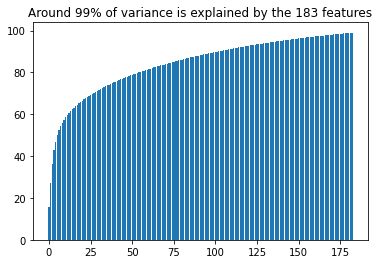

In [103]:
pca99 = PCA(n_components=l)
pca99 = pca99.fit(Xt)
var_exp = pca99.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(l), var_exp)
plt.title("Around 99% of variance is explained by the 183 features");

In [104]:
Y_t = np.where(Yt=='PRAD', 0, Yt) 
Y_t0 = np.where(Yt=='LUAD', 1, Y_t)
Y_t1 = np.where(Y_t0=='BRCA', 2, Y_t0)
Y_t2 = np.where(Y_t1=='KIRC', 3, Y_t1)
Y_t3 = np.where(Y_t2=='COAD', 4, Y_t2)
Y_t3 = Y_t3.tolist()

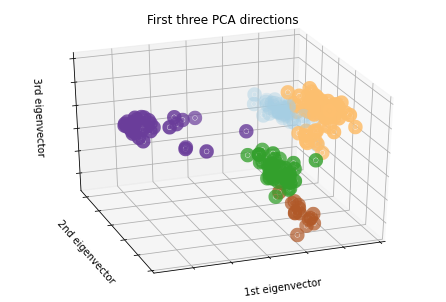

In [105]:
from mpl_toolkits.mplot3d import Axes3D
pca3 = PCA(n_components=3).fit(Xt)
X_train_reduced = pca3.transform(Xt)

plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2], c = Y_t3, cmap = plt.cm.Paired, linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([]);

## Support Vector Machine

Cross validation has been used for evaluation technique to optimize the model performance.

In [106]:
Xt_pca.shape, Xv1_pca.shape

((200, 3), (200, 3))

In [107]:
from sklearn import svm
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 'kernel': ['rbf']} 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(decision_function_shape='ovo'), param_grid, verbose=1)

# Train the classifier
clf_grid.fit(Xt_pca, Yt)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=10, decision_function_shape='ovo', gamma=1e-05)


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.4s finished


In [108]:
model = svm.SVC(kernel='rbf',decision_function_shape='ovo', C = 10, gamma=1e-05)


In [109]:
model.fit(Xt_pca,Yt)
pred1=model.predict(Xv1_pca)
pred2=model.predict(Xv2_pca)
print('Done!')

Done!


In [110]:
confusion_matrix(Yv1, pred1)

array([[74,  0,  0,  1,  0],
       [ 0, 17,  0,  6,  0],
       [ 0,  0, 41,  0,  0],
       [ 0,  0,  0, 30,  0],
       [ 0,  0,  0,  0, 31]])

In [111]:
print('Accuracy: ', accuracy_score(Yv1, pred1))

Accuracy:  0.965


In [113]:
print(confusion_matrix(Yv2, pred2))

[[70  0  0  0  0]
 [ 0 18  0  5  0]
 [ 0  0 36  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 31]]


In [114]:
print('Accuracy: ', accuracy_score(Yv2, pred2))

Accuracy:  0.975


## KMeans Algorithm

In [115]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(Xt_pca)
km_pred = kmeans.predict(Xv1_pca)


In [116]:
from collections import Counter
Counter(kmeans.labels_.tolist())

Counter({2: 39, 3: 39, 0: 72, 1: 33, 4: 17})

In [117]:
Counter(km_pred.tolist())

Counter({0: 71, 1: 41, 2: 31, 3: 36, 4: 21})

In [118]:
Counter(Yt.tolist())

Counter({'PRAD': 39, 'LUAD': 40, 'BRCA': 73, 'KIRC': 34, 'COAD': 14})

In [119]:
Yt_c = []
for n, i in enumerate(Yt.tolist()):
    if i == 'PRAD':
        Yt_c.append(2)
    if i == 'LUAD':
        Yt_c.append(3)
    if i == 'BRCA':
        Yt_c.append(0)
    if i == 'KIRC':
        Yt_c.append(1)
    if i == 'COAD':
        Yt_c.append(4)
Yv1_c = []
for n, i in enumerate(Yv1.tolist()):
    if i == 'PRAD':
        Yv1_c.append(2)
    if i == 'LUAD':
        Yv1_c.append(3)
    if i == 'BRCA':
        Yv1_c.append(0)
    if i == 'KIRC':
        Yv1_c.append(1)
    if i == 'COAD':
        Yv1_c.append(4)

K-means train accuracy: 0.975
K-means test accuracy: 0.95


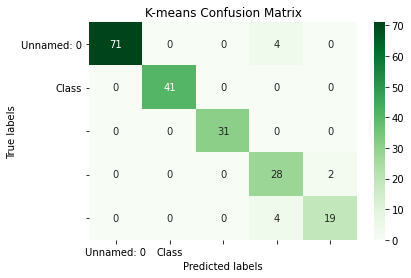

In [120]:
print('K-means train accuracy:', round(accuracy_score(Yt_c, kmeans.labels_.tolist()), 3))
cm_km = confusion_matrix(Yv1_c, km_pred.tolist())

ax = plt.subplot()
sns.heatmap(cm_km, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('K-means Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);
print('K-means test accuracy:', round(accuracy_score(Yv1_c, km_pred.tolist()), 3))

In [121]:
pca2 = PCA()
pca2.fit_transform(Xt)

array([[-6.92845234e+01,  1.22758590e+02,  4.36730233e+01, ...,
        -1.56008615e-01, -1.95688074e-01,  9.95931529e-14],
       [ 1.41076711e+01, -8.56167166e+01,  5.04881579e+01, ...,
         1.78804848e-01,  3.34504380e-01,  9.95931529e-14],
       [-6.66606360e+01,  1.85613260e+01,  4.77366171e+01, ...,
         5.53711482e-01, -4.29907618e-01,  9.95931529e-14],
       ...,
       [-5.29462112e+01, -5.74812141e+01, -7.32971780e+01, ...,
         7.59861041e-02,  5.04320986e-02,  9.95931529e-14],
       [ 1.51180044e+01, -6.47089571e+01,  5.34666882e+01, ...,
         1.15697041e-01,  3.09529867e-01,  9.95931529e-14],
       [ 1.37167206e+01, -4.85377611e+01,  3.89509567e+01, ...,
         3.29564416e-01,  8.42573948e-01,  9.95931529e-14]])

In [122]:
total = sum(pca2.explained_variance_)
l = 0
current_variance = 0
while current_variance/total < 0.60:
    current_variance += pca2.explained_variance_[l]
    l = l + 1
print(l, " features explain around 99% of the variance. From 20531 features to ", l, sep='')

13 features explain around 99% of the variance. From 20531 features to 13


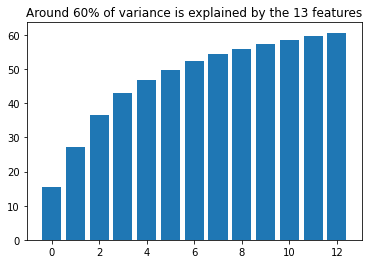

In [123]:
pca2 = PCA(n_components=l)
Xt_pca2 = pca2.fit_transform(Xt)
Xv1_pca2 = pca2.transform(Xv1)
Xv2_pca2 = pca2.transform(Xv2)

var_exp = pca2.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(l), var_exp)
plt.title("Around 60% of variance is explained by the 13 features");

In [124]:
kmeans2 = KMeans(n_clusters=5, random_state=0).fit(Xt_pca2)
km_pred2 = kmeans2.predict(Xv1_pca2)

In [125]:
Counter(kmeans2.labels_.tolist())

Counter({2: 39, 4: 40, 1: 74, 3: 33, 0: 14})

In [126]:
Counter(Yt.tolist())

Counter({'PRAD': 39, 'LUAD': 40, 'BRCA': 73, 'KIRC': 34, 'COAD': 14})

In [127]:
Yt_c2 = []
for n, i in enumerate(Yt.tolist()):
    if i == 'PRAD':
        Yt_c2.append(2)
    if i == 'LUAD':
        Yt_c2.append(4)
    if i == 'BRCA':
        Yt_c2.append(1)
    if i == 'KIRC':
        Yt_c2.append(3)
    if i == 'COAD':
        Yt_c2.append(0)
Yv1_c2 = []
for n, i in enumerate(Yv1.tolist()):
    if i == 'PRAD':
        Yv1_c2.append(2)
    if i == 'LUAD':
        Yv1_c2.append(4)
    if i == 'BRCA':
        Yv1_c2.append(1)
    if i == 'KIRC':
        Yv1_c2.append(3)
    if i == 'COAD':
        Yv1_c2.append(0)

K-means_2 train accuracy: 0.99
K-means_2 test accuracy: 0.995


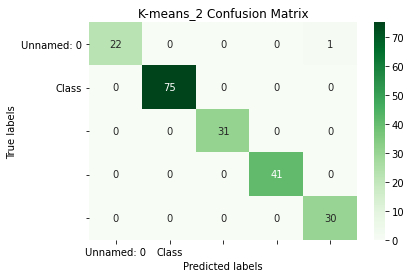

In [128]:
print('K-means_2 train accuracy:', round(accuracy_score(Yt_c2, kmeans2.labels_.tolist()), 3))
cm_km2 = confusion_matrix(Yv1_c2, km_pred2.tolist())

ax = plt.subplot()
sns.heatmap(cm_km2, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('K-means_2 Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);
print('K-means_2 test accuracy:', round(accuracy_score(Yv1_c2, km_pred2.tolist()), 3))

## Neural Network

In [129]:
Y_train = np.where(Yt=='PRAD', 0, Yt) 
Y_train = np.where(Y_train=='LUAD', 1,Y_train)
Y_train = np.where(Y_train=='BRCA', 2, Y_train)
Y_train = np.where(Y_train=='KIRC', 3, Y_train)
Y_train = np.where(Y_train=='COAD', 4, Y_train)
Y_train

array([0, 1, 0, 0, 2, 0, 3, 0, 2, 0, 2, 3, 0, 2, 2, 2, 1, 3, 3, 0, 2, 3,
       1, 2, 3, 1, 4, 2, 2, 2, 2, 2, 3, 2, 0, 2, 3, 1, 2, 2, 3, 0, 0, 3,
       3, 2, 0, 4, 2, 1, 2, 1, 2, 0, 4, 2, 2, 4, 3, 2, 1, 3, 2, 1, 0, 4,
       2, 0, 3, 2, 3, 2, 2, 1, 2, 1, 2, 3, 0, 4, 2, 0, 2, 2, 0, 0, 2, 2,
       3, 2, 0, 0, 2, 2, 2, 0, 4, 2, 0, 2, 2, 3, 2, 3, 1, 3, 1, 4, 1, 1,
       0, 2, 1, 0, 2, 3, 3, 3, 2, 2, 1, 3, 1, 2, 0, 0, 0, 2, 3, 1, 4, 2,
       4, 2, 2, 3, 1, 2, 3, 4, 2, 0, 2, 3, 1, 4, 0, 2, 1, 1, 1, 1, 2, 2,
       1, 2, 2, 0, 0, 1, 0, 1, 3, 2, 0, 1, 4, 3, 1, 2, 3, 1, 2, 1, 2, 2,
       2, 0, 2, 3, 4, 3, 2, 0, 0, 0, 1, 1, 2, 1, 1, 3, 1, 0, 1, 2, 2, 2,
       1, 1], dtype=object)

In [130]:
Y_test = np.where(Yv1=='PRAD', 0, Yv1) 
Y_test = np.where(Y_test=='LUAD', 1,Y_test)
Y_test = np.where(Y_test=='BRCA', 2, Y_test)
Y_test = np.where(Y_test=='KIRC', 3, Y_test)
Y_test = np.where(Y_test=='COAD', 4, Y_test)

In [131]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_test)
Y_test = encoder.transform(Y_test)
# convert integers to dummy variables (i.e. one hot encoded)
Y_test = np_utils.to_categorical(Y_test)

##Y_train
encoder2 = LabelEncoder()
encoder2.fit(Y_train)
Y_train = encoder2.transform(Y_train)
Y_train = np_utils.to_categorical(Y_train)

In [132]:
Y_train[:5]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# define baseline model
def baseline_model():
    #create model
    model = Sequential()
    model.add(Dense(18, input_dim=3, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, Xt_pca, Y_train, cv=kfold)
print("Train: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Train: 97.50% (2.50%)


In [145]:
results2 = cross_val_score(estimator, Xv1_pca, Y_test, cv=kfold)
print("Test: %.2f%% (%.2f%%)" % (results2.mean()*100, results2.std()*100))

Test: 95.00% (3.87%)
